In [ ]:
!find / -name "*.bmp"

find: ‘/proc/62/task/62/net’: Invalid argument
find: ‘/proc/62/net’: Invalid argument
/usr/lib/R/site-library/rmarkdown/rmd/slidy/Slidy2/graphics/nofold.bmp
/usr/lib/R/site-library/rmarkdown/rmd/slidy/Slidy2/graphics/nofold-dim.bmp
/usr/lib/R/site-library/rmarkdown/rmd/slidy/Slidy2/graphics/unfold.bmp
/usr/lib/R/site-library/rmarkdown/rmd/slidy/Slidy2/graphics/fold.bmp
/usr/lib/R/site-library/rmarkdown/rmd/slidy/Slidy2/graphics/fold-dim.bmp
/usr/lib/R/site-library/rmarkdown/rmd/slidy/Slidy2/graphics/unfold-dim.bmp
/usr/local/lib/python3.10/dist-packages/pygame/pygame_icon.bmp
/usr/local/lib/python3.10/dist-packages/pygame/examples/data/asprite.bmp
/usr/local/lib/python3.10/dist-packages/pygame/examples/data/liquid.bmp
/usr/local/lib/python3.10/dist-packages/pygame/examples/data/arraydemo.bmp
/usr/local/lib/python3.10/dist-packages/pygame/pygame_icon_mac.bmp


In [ ]:
filepath = "/usr/local/lib/python3.10/dist-packages/pygame/examples/data/liquid.bmp"


In [ ]:
# Pillowモジュールの読み込み
from PIL import Image

# 画像の読み込み
img = Image.open(filepath)

# 画像情報を表示する
print(img.format)
print(img.size)
print(img.mode)


BMP
(172, 132)
P


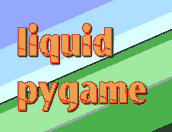

In [ ]:
img

In [ ]:
def dump(body):
    print("         0  1  2  3  4  5  6  7  8  9  A  B  C  D  E  F")
    ascii = ""
    i = 0
    l = 0
    print(f"{l:08X}:", end="")
    for byte in body:
        print(f"{byte:02X} ", end="")
        if byte >= 0x20 and byte <= 0x7e:
            ascii += chr(byte)
        else:
            ascii += '.'
        i += 1
        if i == 16:
            print(" ",ascii)
            ascii = ""
            i = 0
            l += 16
            print(f"{l:08X}:", end="")
    if i != 0:
        print("   "*(16-i),end="")
        print(" ",ascii)

def dump2(filepath):
    with open(filepath, "rb") as f:
        body = f.read()
        dump(body)


In [ ]:
dump2(filepath)

         0  1  2  3  4  5  6  7  8  9  A  B  C  D  E  F
00000000:42 4D D6 2D 00 00 00 00 00 00 76 00 00 00 28 00   BM.-......v...(.
00000010:00 00 AC 00 00 00 84 00 00 00 01 00 04 00 00 00   ................
00000020:00 00 60 2D 00 00 12 0B 00 00 12 0B 00 00 10 00   ..`-............
00000030:00 00 10 00 00 00 2C 3C 2D 00 8F 75 5F 00 4C B0   ......,<-..u_.L.
00000040:4C 00 A2 90 72 00 20 48 EA 00 93 7B C2 00 4E A1   L...r. H...{..N.
00000050:ED 00 A2 AC 92 00 FD A8 94 00 A0 E9 A0 00 FE DF   ................
00000060:AF 00 93 99 D1 00 C5 BA C3 00 97 CB C5 00 FE FE   ................
00000070:DB 00 00 00 00 00 99 99 99 99 99 99 99 99 99 99   ................
00000080:99 99 99 99 99 99 99 99 99 99 99 99 77 77 77 72   ............wwwr
00000090:22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22   """"""""""""""""
000000A0:22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22   """"""""""""""""
000000B0:22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22   """"""""""""""""
000000C0:22 22 00 00 00 00 00 00

In [ ]:
import struct

struct.pack("<bhl",1,2,3)

b'\x01\x02\x00\x03\x00\x00\x00'

In [ ]:
import struct

struct.unpack(">bhl",b'\x01\x02\x00\x03\x00\x00\x00')

(1, 512, 50331648)

In [ ]:
struct.pack("6s",b"test")

b'test\x00\x00'

In [ ]:
struct.pack("6p",b"test")

b'\x04test\x00'

In [ ]:
import struct

with open(filepath, "rb") as f:
    f_header = f.read(14)
    print(struct.unpack("<2sLHHL",f_header))
    i_header_size = struct.unpack("<l",f.read(4))[0]
    if i_header_size == 40:#Windows Bitmapの場合
        i_header = f.read(36)
        print(struct.unpack("<2L2H6L",i_header))
    else:
        print(i_header_size)


(b'BM', 11734, 0, 0, 118)
(172, 132, 1, 4, 0, 11616, 2834, 2834, 16, 16)


In [ ]:
import struct

with open(filepath, "rb") as f:
    f_header = struct.unpack("<2sLHHL",f.read(14))
    i_header_size = struct.unpack("<l",f.read(4))[0]
    if i_header_size == 40:#Windows Bitmapの場合
        i_header = struct.unpack("<2L2H6L",f.read(36))
        bcBitCount = i_header[3]
        biClrUsed = i_header[8]
        if bcBitCount <= 8:
            print("Color Palette: num (R,G,B)")
            for i in range(biClrUsed):
                print(i,struct.unpack("4B",f.read(4)))
    else:
        print(i_header_size)


Color Palette: num (R,G,B)
0 (44, 60, 45, 0)
1 (143, 117, 95, 0)
2 (76, 176, 76, 0)
3 (162, 144, 114, 0)
4 (32, 72, 234, 0)
5 (147, 123, 194, 0)
6 (78, 161, 237, 0)
7 (162, 172, 146, 0)
8 (253, 168, 148, 0)
9 (160, 233, 160, 0)
10 (254, 223, 175, 0)
11 (147, 153, 209, 0)
12 (197, 186, 195, 0)
13 (151, 203, 197, 0)
14 (254, 254, 219, 0)
15 (0, 0, 0, 0)


In [ ]:
src_filepath = "sample_data/README.md"
dst_filepath = "a.bmp"

with open(filepath, "rb") as f:
    body = f.read()
    f_header = struct.unpack("<2sLHHL",body[:0x0E])
    img_offset = f_header[4]

with open(src_filepath, "rb") as f:
    src_body = f.read()

with open(dst_filepath,"wb") as f:
    f.write(body[:img_offset])
    f.write(struct.pack("<L",len(src_body)))
    f.write(src_body)

    rest = len(body) - img_offset - 4 - len(src_body)
    if rest > 0:
        f.write(body[-rest:])


In [ ]:
dump2(dst_filepath)

         0  1  2  3  4  5  6  7  8  9  A  B  C  D  E  F
00000000:42 4D D6 2D 00 00 00 00 00 00 76 00 00 00 28 00   BM.-......v...(.
00000010:00 00 AC 00 00 00 84 00 00 00 01 00 04 00 00 00   ................
00000020:00 00 60 2D 00 00 12 0B 00 00 12 0B 00 00 10 00   ..`-............
00000030:00 00 10 00 00 00 2C 3C 2D 00 8F 75 5F 00 4C B0   ......,<-..u_.L.
00000040:4C 00 A2 90 72 00 20 48 EA 00 93 7B C2 00 4E A1   L...r. H...{..N.
00000050:ED 00 A2 AC 92 00 FD A8 94 00 A0 E9 A0 00 FE DF   ................
00000060:AF 00 93 99 D1 00 C5 BA C3 00 97 CB C5 00 FE FE   ................
00000070:DB 00 00 00 00 00 A2 03 00 00 54 68 69 73 20 64   ..........This d
00000080:69 72 65 63 74 6F 72 79 20 69 6E 63 6C 75 64 65   irectory include
00000090:73 20 61 20 66 65 77 20 73 61 6D 70 6C 65 20 64   s a few sample d
000000A0:61 74 61 73 65 74 73 20 74 6F 20 67 65 74 20 79   atasets to get y
000000B0:6F 75 20 73 74 61 72 74 65 64 2E 0A 0A 2A 20 20   ou started...*  
000000C0:20 60 63 61 6C 69 66 6F

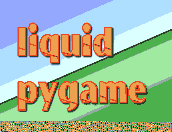

In [ ]:
# モジュールの読み込み
from PIL import Image

# 画像の読み込み
img = Image.open(dst_filepath)

img

In [ ]:
src_filepath = "sample_data/README.md"
dst_filepath = "a.bmp"

with open(filepath, "rb") as f:
    body = f.read()
    f_header = struct.unpack("<2sLHHL",body[:0x0E])
    img_offset = f_header[4]

with open(src_filepath, "rb") as f:
    src_body = f.read()

with open(dst_filepath,"wb") as f:
    f.write(body[:14+40])
    f.write(b'\x00'*(img_offset-54))
    f.write(struct.pack("<L",len(src_body)))
    f.write(src_body)

    rest = len(body) - img_offset - 4 - len(src_body)
    if rest > 0:
        f.write(body[-rest:])


In [ ]:
dump2(dst_filepath)

         0  1  2  3  4  5  6  7  8  9  A  B  C  D  E  F
00000000:42 4D D6 2D 00 00 00 00 00 00 76 00 00 00 28 00   BM.-......v...(.
00000010:00 00 AC 00 00 00 84 00 00 00 01 00 04 00 00 00   ................
00000020:00 00 60 2D 00 00 12 0B 00 00 12 0B 00 00 10 00   ..`-............
00000030:00 00 10 00 00 00 00 00 00 00 00 00 00 00 00 00   ................
00000040:00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00   ................
00000050:00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00   ................
00000060:00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00   ................
00000070:00 00 00 00 00 00 A2 03 00 00 54 68 69 73 20 64   ..........This d
00000080:69 72 65 63 74 6F 72 79 20 69 6E 63 6C 75 64 65   irectory include
00000090:73 20 61 20 66 65 77 20 73 61 6D 70 6C 65 20 64   s a few sample d
000000A0:61 74 61 73 65 74 73 20 74 6F 20 67 65 74 20 79   atasets to get y
000000B0:6F 75 20 73 74 61 72 74 65 64 2E 0A 0A 2A 20 20   ou started...*  
000000C0:20 60 63 61 6C 69 66 6F

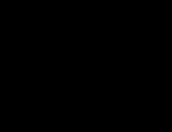

In [ ]:
# モジュールの読み込み
from PIL import Image

# 画像の読み込み
img = Image.open(dst_filepath)

img